## Contents
- 결합 탐색
- 조건 탐색
- 변수 탐색
- 인코딩
- 시각적 탐색

In [ ]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [ ]:
# 행방향으로 합치기

con1=pd.concat([df1,df2],axis=0)
# 행방향으로 합쳤기 때문에 df1, df2의 같은 column 명에 들어 있는 데이터는 df1 제시, df2꺼가 그 하단에 제시됨
# 없는 경우 NaN으로 나옴

con1=pd.concat([df1,df2],axis=0, ignore_index=True)
# ignore_index=True를 하면 인덱스 번호를 재정리해줌
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [ ]:
# 열 방향으로 합치기
con2=pd.concat([df1,df2],axis=1)
# 열 방향으로 합쳐서 중복되는 열이름 무시하고 df1 우측으로 df2가 붙음
# 없는 데이터는 NaN 처리됨
con2

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
df1['ind']=[1,2,3,4]
df1

,a,b,c,d,e,ind
0,1,2,3,4,5,1
1,6,7,8,9,10,2
2,11,12,13,14,15,3
3,16,17,18,19,20,4


In [ ]:
df2['ind']=[1,2,3,4,5]
df2

,d,e,h,i,ind
0,11,12,13,14,1
1,15,16,17,18,2
2,19,20,21,22,3
3,23,24,25,26,4
4,27,28,29,30,5


* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합한는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [ ]:
# merge()를 이용한 결합 : outer 사용
pd.merge(df1, df2, on='ind',how='outer')

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1.0,2.0,3.0,4.0,5.0,1,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,2,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,3,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,4,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,5,27,28,29,30


In [ ]:
# merge()를 이용한 결합 : default (inner)
pd.merge(df1, df2, on='ind') # default는 inner 로 결합시킴 (양쪽 다 있는 데이터만 보여짐)

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [ ]:
# 삭제
df1=df1.drop('ind',axis=1)
df2=df2.drop('ind',axis=1)
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [ ]:
# join은 인덱스 기준으로 결합 (default는 교집합)
# df1.join(df2,lsuffix='_1',rsuffix='2')
df1.join(df2,lsuffix='_1',rsuffix='_2', how='inner')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [ ]:
# outer로 join한다면 없는 데이터에 대해서는 NaN 로 나옴
df1.join(df2,lsuffix='_1',rsuffix='_2', how='outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# 주식 데이터를 가져와서 데이터프레임 만들기
filepath1='/content/drive/MyDrive/KDT_240424/m3_분석라이브러리/dataset/stock price.xlsx' # <== 좌측 '파일' > 'content' > 'drive' 에서 타고 들어가서 선택하고자하는 파일 선택, 경로 복사
filepath2='/content/drive/MyDrive/KDT_240424/m3_분석라이브러리/dataset/stock valuation.xlsx'
df1=pd.read_excel(filepath1, engine='openpyxl',index_col='id')
df2=pd.read_excel(filepath2, engine='openpyxl',index_col='id')

print(df1,'\n')
print(df2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트 

In [ ]:
# df1, df2 결합
# 겹치는 부분은 id 뿐
# 따라서, index 기준으로 결합, join 쓰면 됨
# 중복 column 없어서 suffix 안써도 됨
# df1의 행 인덱스를 기준으로 결합하는 how='left' 옵션이 기본 적용됨.
df3=df1.join(df2)
print(df3)

       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN

In [ ]:
# how=right : 우측 데이터프레임 기준 정렬
df4=df1.join(df2, how='right')
print(df4)

       stock_name          value     price       name           eps     bps  \
id                                                                            
130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   54068   
136480        NaN            NaN       NaN         하림    274.166667    3551   
138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   14894   
139480        이마트  239230.833333  254500.0        이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000.0        삼양사   5741.000000  108090   
161390        NaN            NaN       NaN      한국타이어   5648.500000   51341   
181710        NaN            NaN       NaN  NHN엔터테인먼트   2110.166667   78434   
185750        종근당   40293.666667  100500.0        종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667    5335   
207940        NaN            NaN       NaN   삼성바이오로직스   4644.166667   60099   

              per       pbr  
id                   

In [ ]:
# how=inner : 교집합
# 두 데이터프레임에 공통으로 존재하는 행 인덱스를 기준으로 추출
df4=df1.join(df2, how='inner')
print(df4)

       stock_name          value   price    name           eps     bps  \
id                                                                       
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

              per       pbr  
id                           
130960  15.695091  1.829178  
139480  13.931338  0.860437  
145990  14.283226  0.758627  
185750  25.185866  2.470259  
204210  40.802348  0.651359  


Q. df4에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000보다 적거나 stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df5 이름으로 저장 및 출력하세요. (단, '<' 와 '=='를 반드시 사용해야 함)


In [ ]:
print(df4)
# 1. 중복 컬럼 삭제 ('name'열)

# 2. eps<3000 or stock_name='이마트' 인 케이스를 선택하여 'df5'로 데이터프레임 신규 생성, 출력
df5=(df4['eps']<3000 or df4['stock_name']=='이마트')

       stock_name          value   price    name           eps     bps  \
id                                                                       
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

              per       pbr  
id                           
130960  15.695091  1.829178  
139480  13.931338  0.860437  
145990  14.283226  0.758627  
185750  25.185866  2.470259  
204210  40.802348  0.651359  


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# 강사님 풀이:
df4.drop('name',axis=1, inplace=True)

df5=df4[(df4['eps']<3000) | (df4['stock_name']=='이마트')]
df5

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


In [ ]:
import numpy as np
data=np.arange(20).reshape(4,5)

df=pd.DataFrame(data,columns=['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1=df.copy()
print(df1,'\n')
df1.drop(df1.index[0])

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19 



,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
idx=df1[df1.a>10].index
print(idx,'\n')
df1.drop(idx)

Index([3], dtype='int64') 



,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [ ]:
cond1=df.a>10
cond2=df.b==16
cond3=df.e>15

df[cond1 & cond2 & cond3 ]

,a,b,c,d,e
3,15,16,17,18,19


In [ ]:
# 특정 조건의 특정 열만 결합하고 싶을 때:
df[cond1][['a','b']]


,a,b,c,d,e
3,15,16,17,18,19


In [ ]:
import seaborn as sns
df=sns.load_dataset('titanic')
tdf=df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 열이름 변경:
tdf.rename(columns={'sex':'gender','fare':'ticket'}, inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 값 변경:

# 원본에 반영하고 싶다면:
# df.gender.replace({'female':'1,'male':0},inplace=True)

# 임시로 쓰고 싶다면:
df1=tdf[['gender']].replace(['female','male'],[1,0])
df1.gender.value_counts()

gender
0    577
1    314
Name: count, dtype: int64

In [ ]:
# 칼럼 대문자 변경
tdf.rename(str.upper, axis='columns', inplace=True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
tdf1=df.copy()
tdf1=df.sex.replace({'female':1,'male':0},inplace=True)

In [ ]:
df2=df.copy()
df2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# 컬럼 순서 변경
columns_customed=['pclass','sex','age','survived']
df2[columns_customed].head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [ ]:
tdf1=df[['age','fare']].head()
tdf1

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
tdf1=tdf1.astype({'age':'int','fare':'int'})
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     5 non-null      int64
 1   fare    5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [ ]:
# 칼럼 소문자 변경
tdf.rename(str.lower, axis='columns', inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
tdf.age.value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
# age 컬럼의 값 구성 체크
age_counts_sorted=tdf.age.value_counts()
age_counts_sorted.sort_index()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

In [ ]:
# age 컬럼의 고유 구성 요소
len(tdf.age.unique())
tdf.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
def get_category(age):
    if age<4:
        return 'Baby'
    elif 4<=age<10:
        return 'Child'
    elif 10<=age<19:
        return 'Teenager'
    elif 19<=age<25:
        return 'Young Adult'
    elif 25<=age<60:
        return 'Adult'
    else:
        'Elderly'
tdf['age_cat']=tdf.age.apply(lambda x:get_category(x))
print(tdf)
    # 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult','Elderly'

     survived  pclass  gender   age  sibsp  parch   ticket embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
# 다른 방식으로 풀이:
category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = tdf.age.fillna(0).values
tdf['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels=category)
tdf[['age','cat']].head()

,age,cat
0,22.0,Teenager
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용

In [ ]:
tdf.gender.value_counts()

gender
male      577
female    314
Name: count, dtype: int64

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
features=['gender','age']
for feature in features:
    tdf[feature]=le.fit_transform(tdf[feature]) # tdf의 'gender'와 'age' 각각에 레이블인코딩하라는 뜻
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,cat
0,0,3,1,28,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult,Teenager
1,1,1,0,51,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Adult
2,1,3,0,34,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult,Young Adult
3,1,1,0,47,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,Young Adult
4,0,3,1,47,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,Young Adult


In [ ]:
tdf2=tdf[['gender','class']]
tdf2.head()

,gender,class
0,1,Third
1,0,First
2,0,Third
3,0,First
4,1,Third


In [ ]:
# one hot encoding (get_dummies 함수를 사용해서 같은 방식으로 적용)
import pandas as pd
pd.get_dummies(tdf2).head()
# tdf2의 gender는 0,1로 되어 있으니 가만히 두고,
# 'class'는 각 등급에 대해 column이 생기고, 맞는 곳에 True, 아닌 곳은 False 가 뜸


,gender,class_First,class_Second,class_Third
0,1,False,False,True
1,0,True,False,False
2,0,False,False,True
3,0,True,False,False
4,1,False,False,True


Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

In [ ]:
# randn 설명:

num= np.random.randn(1000) # 샘플이 많아질 수록 표준분포와 가까워짐. 샘플이 적을수록 오차 범위가 넓어짐
mean_val=num.mean()
std_dev=num.std()
print(mean_val,std_dev)

0.024654487312057233 1.0053323676619919


In [ ]:
# 데이터 생성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ts=pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000)) # randn(1000)= 표준정규분포를 따르는 1000개의 난수 뽑기
ts1=ts.cumsum()
df=pd.DataFrame({'value':ts,'cum':ts1})
df.head()

,value,cum
2020-01-01,-1.301283,-1.301283
2020-01-02,0.880000,-0.421283
2020-01-03,-0.134719,-0.556002
2020-01-04,-0.935370,-1.491372
2020-01-05,-0.988359,-2.479731


## line graph

2020-01-01    -0.653085
2020-01-02    -1.112567
2020-01-03    -1.752089
2020-01-04    -1.447859
2020-01-05    -0.853009
                ...    
2022-09-22   -70.080308
2022-09-23   -69.838717
2022-09-24   -69.917726
2022-09-25   -70.969263
2022-09-26   -70.827194
Freq: D, Length: 1000, dtype: float64



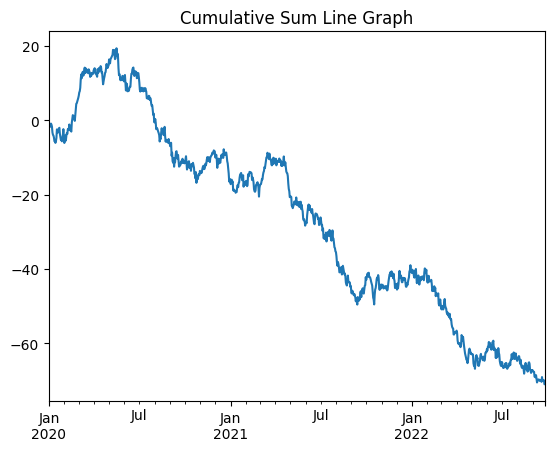

In [ ]:
# 라인 그래프 그리기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
ts=pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000)) # randn(1000)= 표준정규분포를 따르는 1000개의 난수 뽑기
ts=ts.cumsum()
print(ts)
print()
# 라인 그래프
ts.plot()
plt.title('Cumulative Sum Line Graph')
plt.show()

### bar graph

              A         B
one    0.586676  0.724038
two    0.382112  0.004070
three  0.085796  0.602483
four   0.729507  0.291262
five   0.271621  0.213331 



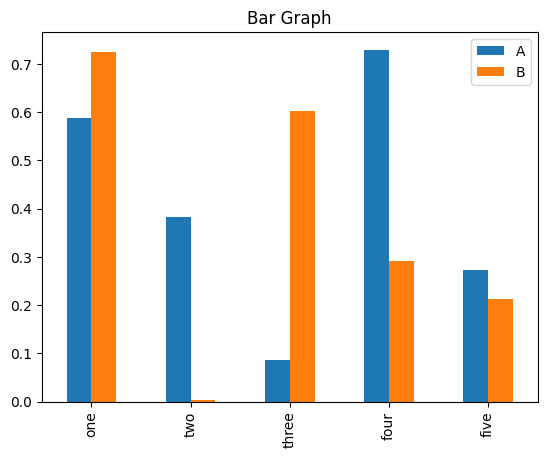

In [ ]:
# 막대 그래프 그리기

# 예제 데이터 생성
df=pd.DataFrame({
    'A':np.random.rand(5),
    'B':np.random.rand(5),
},index=['one','two','three','four','five'])
print(df,'\n')

# 막대 그래프
df.plot.bar()
plt.title('Bar Graph')
plt.show()

### historgram

            A         B
0   -0.254830 -1.930399
1   -0.462812  0.080044
2   -0.182489  1.531041
3   -0.138035  1.085971
4    0.708379  0.860476
..        ...       ...
995  0.379198  1.975177
996 -0.485423 -0.088743
997 -0.327938  0.151578
998 -0.228148 -1.204259
999 -0.241689 -0.409802

[1000 rows x 2 columns] 



<function matplotlib.pyplot.show(close=None, block=None)>

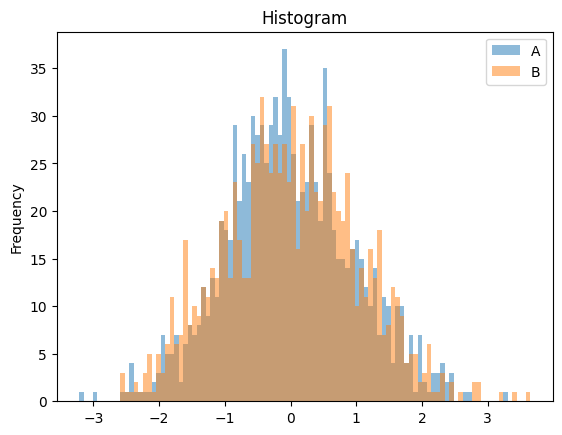

In [ ]:
# 히스토그램 그리기
# 예제 데이터 생성
df=pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000),
})
print(df,'\n')

# 히스토그램
df.plot.hist(alpha=0.5, bins=100) # <== alpha== 투명도. 숫자가 높을 수록 색이 진해짐. bins== 구간. 숫자가 높을수록 더 촘촘해짐
plt.title('Histogram')
plt.show

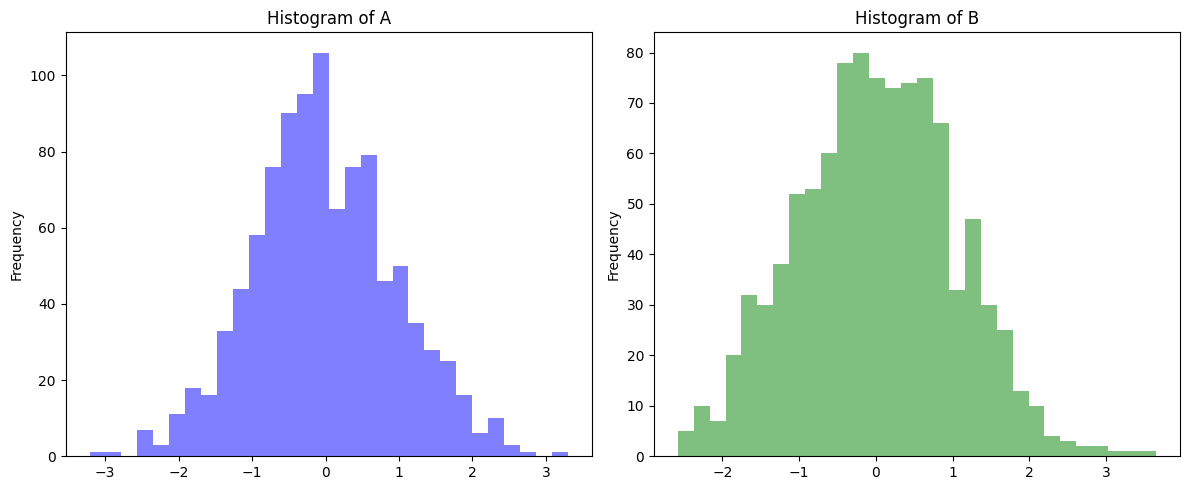

In [ ]:
# 데이터프레임에서 특정 열에 대해서만 따로 히스토그램 만들고 싶다면:

# 그래프 크기 설정
plt.figure(figsize=(12,5))

# 첫번째 히스토그램 ( A )
plt.subplot(1,2,1) # <= 1행2열의 1번째
df['A'].plot.hist(alpha=0.5, bins=30, color='blue')
plt.title('Histogram of A')

# 두번째 히스토그램 ( B )
plt.subplot(1,2,2) # <= 1행2열의 2번째
df['B'].plot.hist(alpha=0.5, bins=30, color='green')
plt.title('Histogram of B')

# 레이앙웃 조정
plt.tight_layout()
plt.show()

### box plot

          A         B         C         D         E
0  0.142773  0.890991  0.176584  0.487280  0.322841
1  0.133176  0.282153  0.458419  0.637787  0.391308
2  0.933585  0.004055  0.849411  0.646093  0.113887
3  0.170049  0.865867  0.086721  0.142505  0.206830
4  0.795132  0.486541  0.235461  0.788483  0.711187
5  0.895877  0.993405  0.811848  0.551393  0.579672
6  0.935746  0.919687  0.207340  0.167647  0.389062
7  0.699859  0.560324  0.152433  0.597769  0.995577
8  0.629061  0.033051  0.686872  0.089110  0.679902
9  0.529757  0.368202  0.365806  0.057849  0.041721 

               A          B          C          D          E
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.586502   0.540428   0.403090   0.416592   0.443199
std     0.329206   0.368575   0.285173   0.272628   0.297621
min     0.133176   0.004055   0.086721   0.057849   0.041721
25%     0.259976   0.303665   0.184273   0.148790   0.235833
50%     0.664460   0.523432   0.300634   0.519336   0.390185

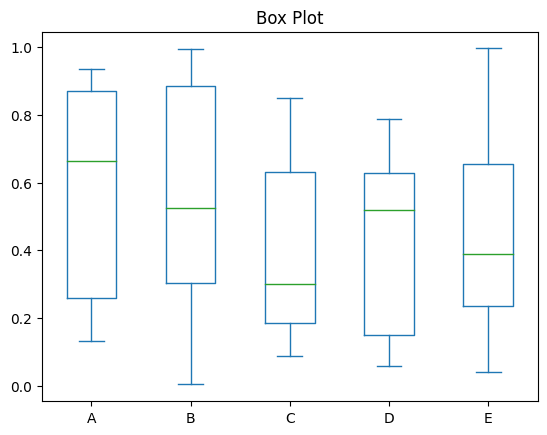

In [ ]:
df=pd.DataFrame(np.random.rand(10,5),columns=['A','B','C','D','E'])
print(df,'\n')
print(df.describe())
# 박스 플롯
df.plot.box()
plt.title('Box Plot')
plt.show()

### scatter plot

          A         B         C         D
0  0.140229  0.721698  0.036999  0.966613
1  0.849459  0.854462  0.293547  0.777861
2  0.364638  0.170068  0.950251  0.382397
3  0.549522  0.836389  0.166267  0.672014
4  0.043295  0.328170  0.042496  0.648681 



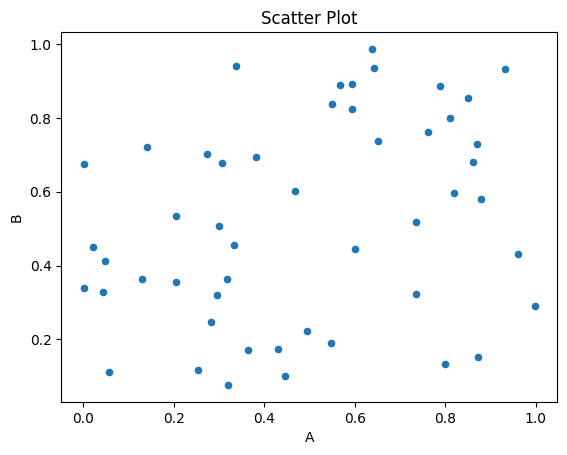

In [ ]:
df=pd.DataFrame(np.random.rand(50,4), columns=['A','B','C','D'])
print(df.head(),'\n')

# scatter plot 생성
df.plot.scatter(x='A',y='B')
plt.title('Scatter Plot')
plt.show()

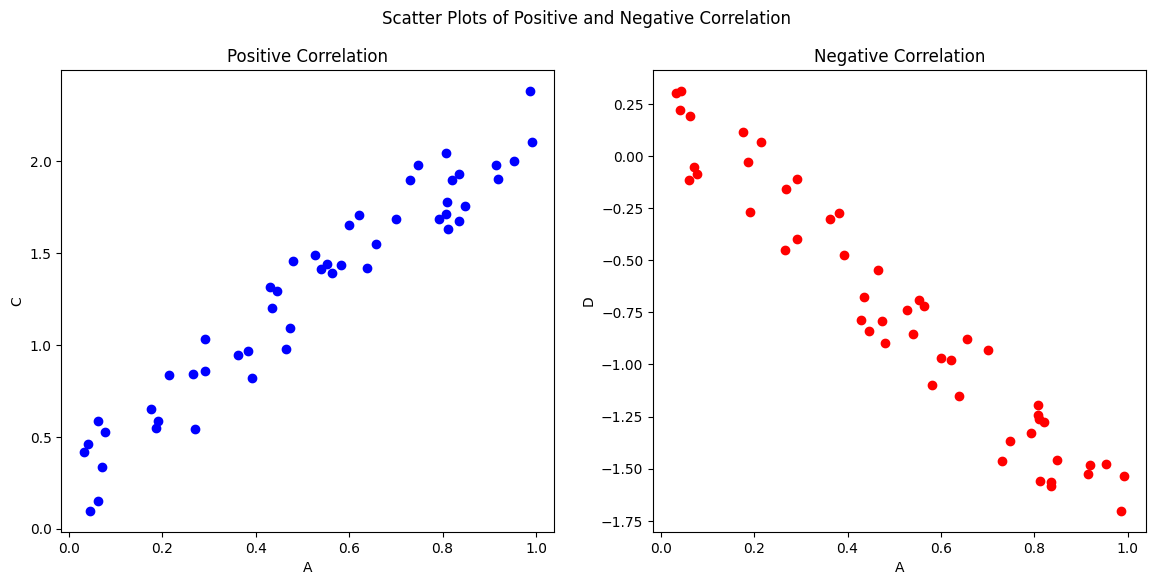

In [ ]:
df=pd.DataFrame(np.random.rand(50,4), columns=['A','B','C','D'])

# 양의 상관관계
df['C']=df['A']*2+np.random.rand(50)*0.5

# 음의 상관관계
df['D']=-df['A']*2+np.random.rand(50)*0.5

fig, axs=plt.subplots(1,2,figsize=(14,6))

axs[0].scatter(df['A'],df['C'], color='blue')
axs[0].set_title('Positive Correlation')
axs[0].set_xlabel('A')
axs[0].set_ylabel('C')

axs[1].scatter(df['A'],df['D'], color='red')
axs[1].set_title('Negative Correlation')
axs[1].set_xlabel('A')
axs[1].set_ylabel('D')

plt.suptitle('Scatter Plots of Positive and Negative Correlation')
plt.show()

### 커널 밀도 추정 (KDE)

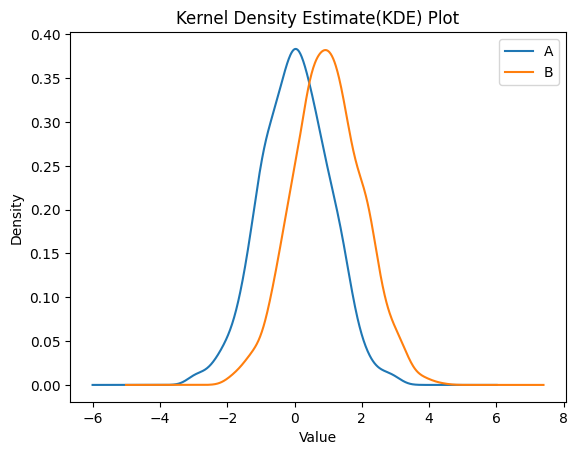

In [ ]:
# 커널 밀도 추정 (KDE, Kernel Density Estimate) 그래프는 데이터의 분포를 부드럽게 나타내는 그래프
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data=pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000)+1
})

# KDE 그래프
data['A'].plot.kde(label='A')
data['B'].plot.kde(label='B')
plt.title('Kernel Density Estimate(KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

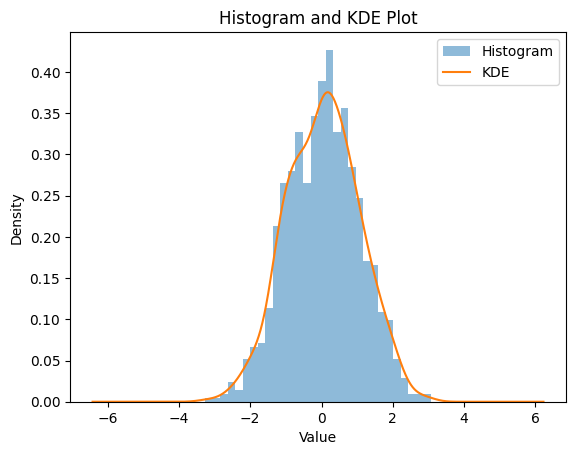

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data=pd.Series(np.random.randn(1000))

# 히스토그램과 KDE 같이 그리기
ax=data.plot.hist(bins=30, alpha=0.5, density=True, label='Histogram') # 히스토그램
data.plot.kde(ax=ax, label='KDE') # KDE 그래프
plt.title('Histogram and KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### 0530 과제

Task1_0530. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.

In [ ]:
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})
print(customers,'\n')
print(purchases)

   customer_id     name
0            1    Alice
1            2      Bob
2            3  Charlie
3            4    David 

   purchase_id  customer_id  amount
0          101            1     250
1          102            2     150
2          103            1     200
3          104            3     300
4          105            2     350


In [ ]:
# 결합 기준: customer_id
# customer_info=customers.join(purchases, lsuffix='cid_1', rsuffix='cid_2', how='outer')
# customer_info.drop

# 1. 결합
customer_info=pd.merge(customers,purchases, on='customer_id')

# 2. 고객 별 합계
customer_info['total_amount']=customer_info.groupby('name')['amount'].transform('sum')
print(customer_info)

# 3. 정리된 데이터
result=customer_info[['name','total_amount']].drop_duplicates().reset_index(drop=True)
print("\n중복 없이 정리된 결과: \n",result)


   customer_id     name  purchase_id  amount  total_amount
0            1    Alice          101     250           450
1            1    Alice          103     200           450
2            2      Bob          102     150           500
3            2      Bob          105     350           500
4            3  Charlie          104     300           300

중복 없이 정리된 결과: 
       name  total_amount
0    Alice           450
1      Bob           500
2  Charlie           300


In [ ]:
# 강사님 풀이
# 두 데이터프레임 결합(내부 조인)
merged_df=pd.merge(customers, purchases,on='customer_id',how='inner')

# 고객별 총 지출 계산
total_spent=merged_df.groupby('name')['amount'].sum().reset_index()

# 결과 출력
print(total_spent)

      name  amount
0    Alice     450
1      Bob     500
2  Charlie     300


Task2_0530. 학생 성적 데이터프레임과 과목 데이터프레임을 결합하여 각 과목별 평균 성적을 계산하여 출력하세요.

In [ ]:
import pandas as pd

# 학생 성적 데이터프레임 생성
grades = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 1, 2, 3, 4],
    'subject_id': [101, 101, 102, 102, 103, 103, 101, 103],
    'grade': [85, 90, 78, 88, 92, 95, 80, 85]
})

# 과목 데이터프레임 생성
subjects = pd.DataFrame({
    'subject_id': [101, 102, 103],
    'subject_name': ['Math', 'Science', 'History']
})
print(grades,'\n')
print(subjects)

   student_id  subject_id  grade
0           1         101     85
1           2         101     90
2           3         102     78
3           4         102     88
4           1         103     92
5           2         103     95
6           3         101     80
7           4         103     85 

   subject_id subject_name
0         101         Math
1         102      Science
2         103      History


In [ ]:
# 학생 성적, 과목 데이터프레임 결합
# 공통 열 : subject_id

grade_per_subject=pd.merge(subjects,grades,on='subject_id')
# print(grade_per_subject)

# 과목별 평균 성적 계산, 출력
grade_per_subject['average_grade']=grade_per_subject.groupby('subject_name')['grade'].transform('mean')
# print(grade_per_subject)

# 중복 삭제, 정리된 결과 :
average_grade=grade_per_subject[['subject_name','average_grade']].drop_duplicates().reset_index(drop=True)
print(average_grade)

  subject_name  average_grade
0         Math      85.000000
1      Science      83.000000
2      History      90.666667


In [ ]:
# 강사님 풀이
# 두 데이터프레임 결합(내부 조인)
merged_df=pd.merge(grades, subjects,on='subject_id',how='inner')

# 고객별 총 지출 계산
average_grades=merged_df.groupby('subject_name')['grade'].mean().reset_index()

# 결과 출력
print(average_grades)

  subject_name      grade
0      History  90.666667
1         Math  85.000000
2      Science  83.000000


Task3_0530. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})
customers

,customer_id,name,age,spending
0,1,Alice,25,300
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700
4,5,Eve,28,400


In [ ]:
# 탐색 조건 :age>=30 & spending>=500
customers_sel=customers[(customers.age>=30) & (customers.spending>=500)]
print(customers_sel)

   customer_id     name  age  spending
1            2      Bob   35       600
2            3  Charlie   30       500
3            4    David   40       700


In [ ]:
# 강사님 풀이:
con1=customers['age']>=30
con2=customers['spending']>=500
filtered_customers=customers[con1&con2]

# 결과 출력
print(filtered_customers)

   customer_id     name  age  spending
1            2      Bob   35       600
2            3  Charlie   30       500
3            4    David   40       700


Task4_0530. 학생 성적 데이터프레임에서 math_score가 80 이상 90 이하인 학생을 찾아 출력하세요.

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
students = pd.DataFrame({
    'student_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math_score': [75, 85, 88, 92, 78],
    'english_score': [80, 78, 82, 88, 90]
})
students

,student_id,name,math_score,english_score
0,101,Alice,75,80
1,102,Bob,85,78
2,103,Charlie,88,82
3,104,David,92,88
4,105,Eve,78,90


In [ ]:
# 탐색 조건: 80<=math_score<=90
students_sel=students[(students.math_score>=80) & (students.math_score<=90)]
print(students_sel)

   student_id     name  math_score  english_score
1         102      Bob          85             78
2         103  Charlie          88             82


In [ ]:
# 강사님 풀이:
# 조건을 만족하는 학생 찾기 (80<=math_score<=90)
c1=students['math_score']>=80
c2=students['math_score']<=90
filtered_students=students[c1&c2]

# 결과 출력
print(filtered_students)

   student_id     name  math_score  english_score
1         102      Bob          85             78
2         103  Charlie          88             82


Task5_0530. 주어진 titanic3 데이터셋에서 survived 열을 사용하여 생존자와 비생존자의 수를 계산하여 출력하세요.

In [ ]:
# 마운트하지 않고 로컬에서 파일 불러와서 하는 법:
from google.colab import files

# 파일 업로드
uploaded=files.upload()

Saving titanic3.csv to titanic3.csv


In [ ]:
!ls

drive  sample_data  titanic3.csv


In [ ]:
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

# task: survive열 사용. 생존자와 비생존자의 수 계산.
# survived==1 : 생존, survive==0 : 비생존
df1=df.copy()

survived_count=df1.survived.value_counts()
print(survived_count)

survived
0    809
1    500
Name: count, dtype: int64


In [ ]:
# 강사님 풀이:
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

survival_counts=df['survived'].value_counts()
print(survival_counts)

survived
0    809
1    500
Name: count, dtype: int64


Task6_0530. 주어진 titanic3 데이터셋에서 pclass 열을 기준으로 각 객실 등급의 평균 운임(fare)을 계산하여 출력하세요.

In [ ]:
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

# task: pclass 열 기준으로 각 객실 등급의 fare 계산, 출력
df1=df.copy()

# 1. 그룹만들어서 average fare 계산하고
df1['average_fare']=df1.groupby('pclass')['fare'].transform('mean')

# 2. 중복값 제거해서 등급과 요금만 보이도록 출력
df2=df1[['pclass','average_fare']].drop_duplicates().reset_index(drop=True)
print(df2)


,pclass,average_fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [ ]:
# 강사님 풀이:
import pandas as pd

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# 객실 등급별 평균 운임 계산
average_fare_by_class = df.groupby('pclass')['fare'].mean()

# 결과 출력
print(average_fare_by_class)

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64


Task7_0530. titanic3 각 변수의 상관계수를 통해 각 변수와 목표 변수(생존 여부) 간의 관계를 파악하세요.

In [ ]:
import pandas as pd
import numpy as np

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

# 상관 관계 파악을 위한 변수 정리:
# survived // sex, age, pclass, sibsp, parch, fare

# 1. sex은 0,1로 변환 필요
df_t3=df.copy()
df_t3.sex.replace({'female':1,'male':0},inplace=True)

# 2. 상관관계 확인을 위해 필요한 정보:
# .corr(method=) 함수로 상관관계 확인
df_t4=df_t3[['survived','sex','age','pclass','sibsp','parch','fare']] # 상관관계 확인할 변수들만 모은 데이터프레임
titanic_corr=df_t4.corr(method='pearson') # 상관관계 함수 사용
print(titanic_corr) # 결과

# 3. 해석:
# 생존 1위 요소 : 성별 (여성일수록 살 확률 높음)
# 생존 2위 요소 : 등급 (1등급에 가까워질수록 살 확률 높음)
# 생존 3위 요소 : 요금 (지불한 요금이 높을수록 살 확률 높음)

          survived       sex       age    pclass     sibsp     parch      fare
survived  1.000000  0.528693 -0.055512 -0.312469 -0.027825  0.082660  0.244265
sex       0.528693  1.000000 -0.063645 -0.124617  0.109609  0.213125  0.185523
age      -0.055512 -0.063645  1.000000 -0.408106 -0.243699 -0.150917  0.178740
pclass   -0.312469 -0.124617 -0.408106  1.000000  0.060832  0.018322 -0.558629
sibsp    -0.027825  0.109609 -0.243699  0.060832  1.000000  0.373587  0.160238
parch     0.082660  0.213125 -0.150917  0.018322  0.373587  1.000000  0.221539
fare      0.244265  0.185523  0.178740 -0.558629  0.160238  0.221539  1.000000


In [ ]:
# 강사님 풀이:
import pandas as pd
import numpy as np

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# 정보 확인
df.info()

# 문자열 변수를 숫자형으로 변환
df['sex']=df['sex'].map({'male':0,'female':1})

# 숫자형 변수만 선택
numeric_df=df.select_dtypes(include=[np.number])

# 상관관계 계산
correlation_matrix=numeric_df.corr()
print(correlation_matrix)

# 생존 여부와의 상관계수 정렬
survival_correlation=correlation_matrix['survived'].sort_values(ascending=False)
print(survival_correlation)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
            pclass  survived       sex       age     sibsp     parch  \
pclass    1.000000 -0.312469 -0.124617 -0.408106  0.060832  0.018322   
survived -0.312469  1.000000  0.528693 -0.055

Task8_0530. 승객의 가족 크기(동반한 형제자매/배우자 수와 부모/자녀 수의 합)가 생존에 영향을 미치는지를 탐색하여 결과를 출력하세요.

In [ ]:
import pandas as pd
import numpy as np

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

# 1. 필요한 데이터만 뽑아서 새로 만들기
# 필요 데이터: name, survived, sibsp, parch
df1=df.copy()
df2=df1[['survived','name','sibsp','parch']]
df2.head()
df2['num_family']=df2['sibsp']+df2['parch']
print(df2)

# correlation 확인

      survived                                             name  sibsp  parch  \
0            1                    Allen, Miss. Elisabeth Walton      0      0   
1            1                   Allison, Master. Hudson Trevor      1      2   
2            0                     Allison, Miss. Helen Loraine      1      2   
3            0             Allison, Mr. Hudson Joshua Creighton      1      2   
4            0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)      1      2   
...        ...                                              ...    ...    ...   
1304         0                             Zabour, Miss. Hileni      1      0   
1305         0                            Zabour, Miss. Thamine      1      0   
1306         0                        Zakarian, Mr. Mapriededer      0      0   
1307         0                              Zakarian, Mr. Ortin      0      0   
1308         0                               Zimmerman, Mr. Leo      0      0   

      num_family  
0       

<ipython-input-19-8a71ab09ab5e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['num_family']=df2['sibsp']+df2['parch']


In [ ]:
# 가족 크기 계산
df['family_size']=df['sibsp']+df['parch']

# 생존 여부와 가족 크기의 관계 탐색
survival_family_correlation=df[['family_size','survived']].corr().iloc[0,1]
survival_family_correlation

0.02687643412533259

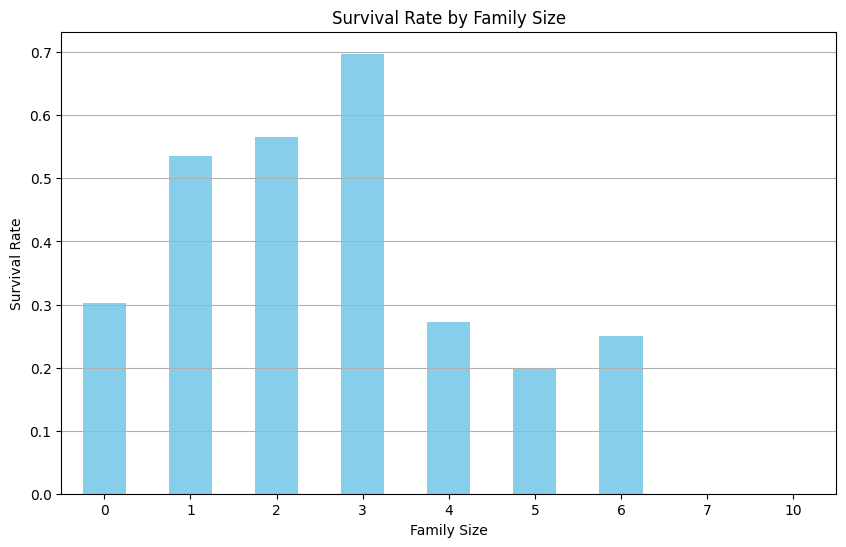

In [ ]:
# 시각화
import matplotlib.pyplot as plt

# 가족 크기별 생존율 계산
family_survival_rate = df.groupby('family_size')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

Task9_0530. 객실 등급별 평균 요금(mean_fare_by_pclass)이 생존에 미치는 영향을 분석하기 위해 mean_fare_by_pclass라는 파생 변수를 생성하여 출력하세요.

In [ ]:
# 강사님 풀이:
# 객실 등급별 평균 요금 계산
mean_fare_by_pclass=df.groupby('pclass')['fare'].mean().to_dict()
print(mean_fare_by_pclass,'\n')

# 객실 등급별 평균 요금 파생 변수 생성
df['mean_fare_by_pclass']=df['pclass'].map(mean_fare_by_pclass)
df[['pclass','fare','mean_fare_by_pclass']].head()

{1: 87.50899164086687, 2: 21.179196389891697, 3: 13.302888700564973} 



,pclass,fare,mean_fare_by_pclass
0,1,211.3375,87.508992
1,1,151.5500,87.508992
2,1,151.5500,87.508992
3,1,151.5500,87.508992
4,1,151.5500,87.508992


In [ ]:
# mean_fare_by_pclass와 생존 여부 간의 상관계수 계산
mean_fare_survival_correlation=df[['mean_fare_by_pclass','survived']].corr().iloc[0,1]
mean_fare_survival_correlation

0.2918753351352463

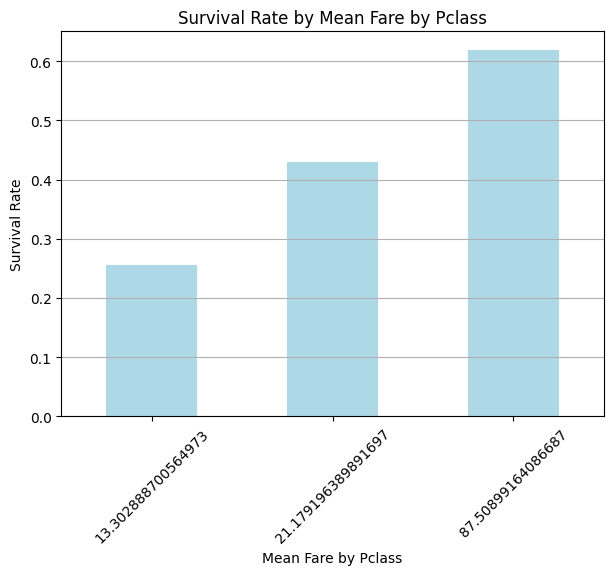

In [ ]:
# 생존율과 Mean Fare by Pclass 간의 막대그래프 그리기

# 생존율 계산
survival_rate_by_fare = df.groupby('mean_fare_by_pclass')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(7, 5))
survival_rate_by_fare.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

### 0531 수업

Q. titanic3 데이터에서 성별과 생존율의 관계를 시각화 하세요.

In [ ]:
from google.colab import files
files_upload=files.upload()

Saving titanic3.csv to titanic3 (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  1309 non-null   int64 
 1   sex       1309 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.6+ KB
sex
female    0.727468
male      0.190985
Name: survived, dtype: float64


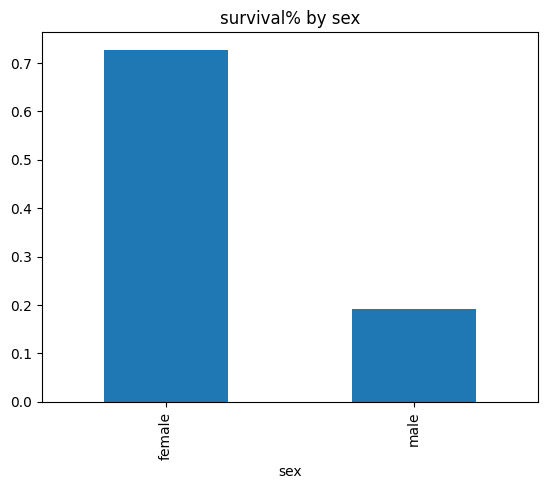

In [ ]:
# 성별과 생존율의 관계 시각화
# x-axis= 성별, y-axis=생존 %, 막대그래프

# 1. 데이터 카피
tdf=df.copy()

# 2. 시각화할 데이터만 추출
tdf_sex=tdf[['survived','sex']]

# 3. 그루핑 필요
tdf_sex.info()
tdf_sex=tdf_sex.groupby('sex')['survived'].mean()
print(tdf_sex)

# 3. 막대그래프 생성
tdf_sex.plot.bar()
plt.title('survival% by sex')
plt.show()

sex
male      0.190985
female    0.727468
Name: survived, dtype: float64 



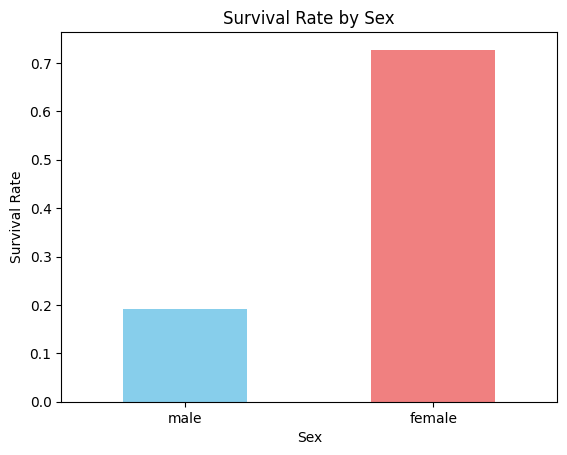

In [ ]:
# 강사님 풀이:
survival_by_sex=df.groupby('sex')['survived'].mean().sort_values()
print(survival_by_sex,'\n')

# 시각화
survival_by_sex.plot(kind='bar',color=['skyblue','lightcoral'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

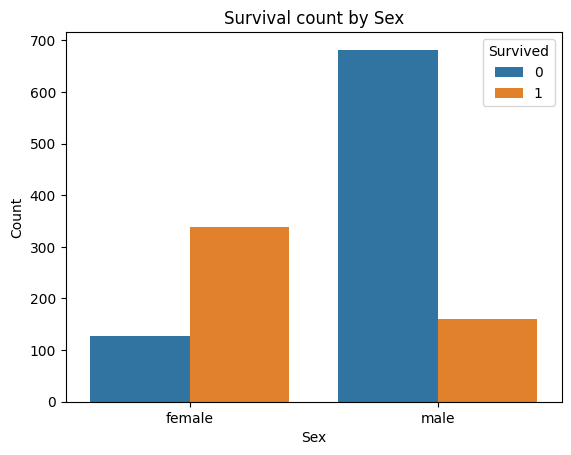

In [ ]:
# 강사님 풀이 (seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

# 성별과 승객 (생존, 사망) 수 관계 시각화
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

Q. 승객 등급과 생존율 관계를 pandas를 이용하여 시각화 하세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

<ipython-input-76-131a91f9e1a8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf_pclass.pclass.replace({1:'1st class', 2:'2nd class', 3:'3rd class'}, inplace=True)


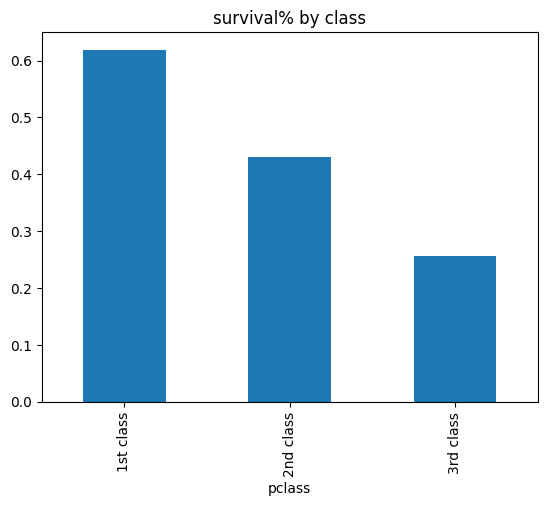

In [ ]:
# 원본 카피
tdf=df.copy()

# 1. 필요 데이터만 추출
tdf_pclass=tdf[['survived','pclass']]
tdf_pclass.head()

# 2. survived % 로 만들어야 함
tdf_pclass.pclass.replace({1:'1st class', 2:'2nd class', 3:'3rd class'}, inplace=True)
tdf_pclass=tdf_pclass.groupby('pclass')['survived'].mean()
tdf_pclass

# 3. 막대그래프로 표현
tdf_pclass.plot.bar()
plt.title('survival% by class')
plt.show()

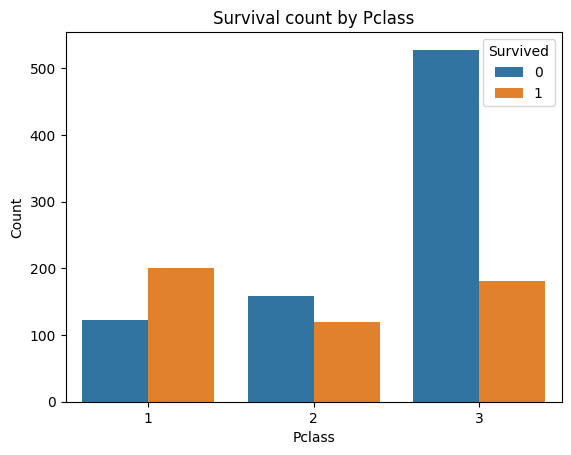

In [ ]:
# 승객 등급과 승객 (생존사망)
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

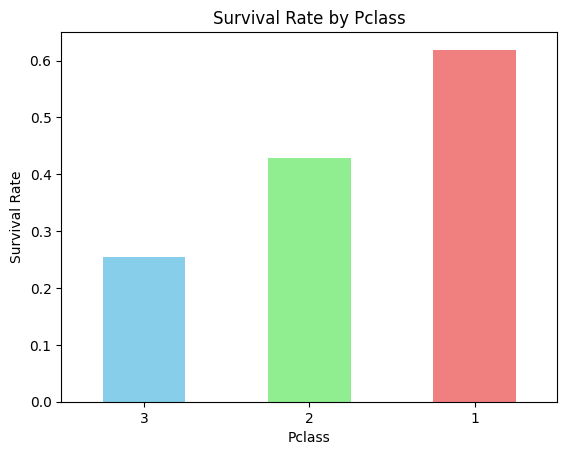

In [ ]:
# 강사님 풀이:
survival_by_pclass=df.groupby('pclass')['survived'].mean().sort_values()

# 시각화
survival_by_pclass.plot(kind='bar', color=['skyblue','lightgreen','lightcoral'])
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

Q. 나이와 생존율 관계를 시각화하여 출력하세요.

<ipython-input-138-830832872605>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf_age['age_range']=tdf_age['age'].transform(lambda age:age_range(age))


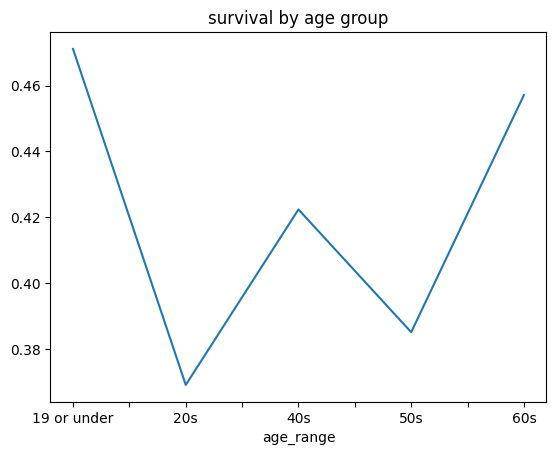

In [ ]:
tdf3=df.copy()
tdf3
tdf3['age'].describe()

# 1. 나이 결측치 처리
# 나이 값이 없는 데이터는 None으로 명명해줘야하나?


# 나이, 생존율
tdf_age=tdf3[['survived','age']]
tdf_age.describe()

# 1. 나이 범위 단위로 넣어주기 (나이 없는 경우는 None으로 뜰거)
def age_range(age):
    if age<20:
        return '19 or under'
    elif 20<=age<30:
        return '20s'
    elif 30<=age<40:
        return '40s'
    elif 40<=age<50:
        return '50s'
    elif 50<=age<60:
        return '60s'
    else:
        '60s or above'

tdf_age['age_range']=tdf_age['age'].transform(lambda age:age_range(age))
tdf_age

tdf_age2=tdf_age.groupby('age_range')['survived'].mean()
tdf_age2

# 2. 라인그래프
tdf_age2.plot(kind='line') # <== y축 축조절 어떻게 하지?
plt.title('survival by age group')
plt.show()

age_group
(0, 10]      0.581395
(10, 20]     0.395062
(20, 30]     0.371191
(30, 40]     0.423810
(40, 50]     0.393939
(50, 60]     0.483871
(60, 70]     0.222222
(70, 80]     0.333333
(80, 90]          NaN
(90, 100]         NaN
Name: survived, dtype: float64 



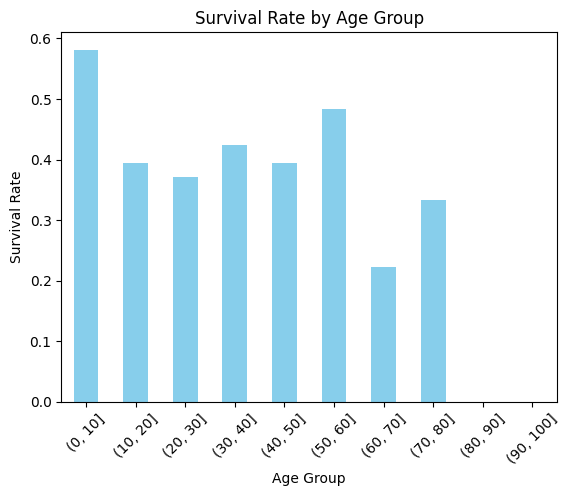

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp

# 데이터프레임 읽기
file_path = 'titanic3.csv'
df = pd.read_csv(file_path)

# 나이와 생존율 관계 계산을 위해 나이를 그룹화
# (0,10] : 0 초과 10 이하
df['age_group']=pd.cut(df['age'],bins=[0,10,20,30,40,50,60,70,80,90,100])

# 나이 그룹별 생존율 계산
survival_by_age_group=df.groupby('age_group')['survived'].mean()
print(survival_by_age_group,'\n')

# 시각화
survival_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

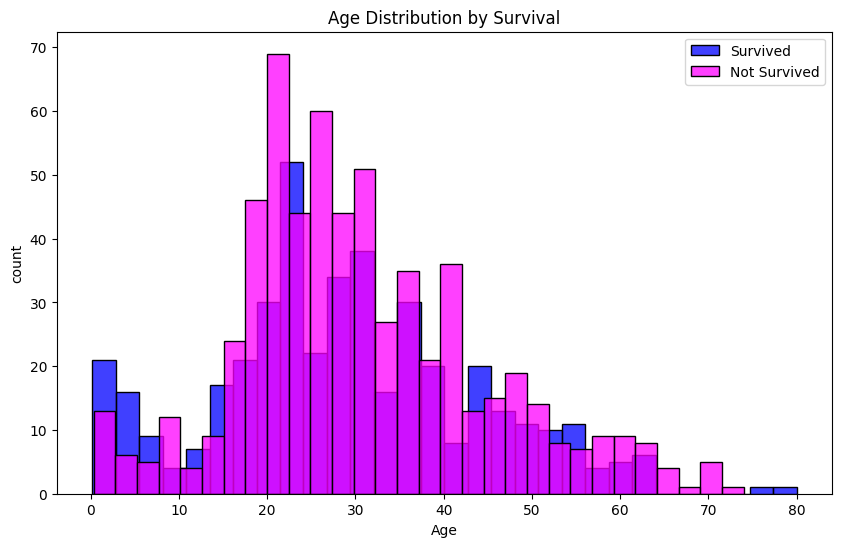

In [ ]:
# 나이와 생존, 사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df['survived']==1]['age'],bins=30,kde=False,color='blue',label='Survived')
# df[df['survived']==1] : 블린 인덱싱. survived==1인것만 뽑기
# df[df['survived']==1]['age'] : survived==1인것만 뽑은 것에서 ['age']
sns.histplot(df[df['survived']==0]['age'],bins=30,kde=False,color='magenta',label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend()
plt.show()


Q. 요금과 생존율 관계를 Pandas를 이용해 시각화하여 출력하세요.

fare_group
(0, 50]       0.323501
(50, 100]     0.628205
(100, 150]    0.787879
(150, 200]    0.615385
(200, 250]    0.571429
(250, 300]    0.769231
(300, 350]         NaN
(350, 400]         NaN
(400, 450]         NaN
(450, 500]         NaN
Name: survived, dtype: float64 



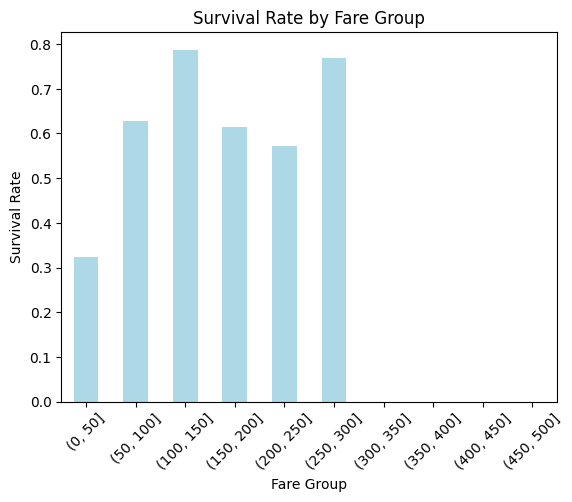

In [ ]:
# 요금과 생존율 관계 계산을 위해 요금을 그룹화
df['fare_group']=pd.cut(df['fare'],bins=[0,50,100,150,200,250,300,350,400,450,500])

# 요금 그룹별 생존율 계산
survival_by_fare_group=df.groupby('fare_group')['survived'].mean()
print(survival_by_fare_group,'\n')

# 시각화
survival_by_fare_group.plot(kind='bar',color='lightblue')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

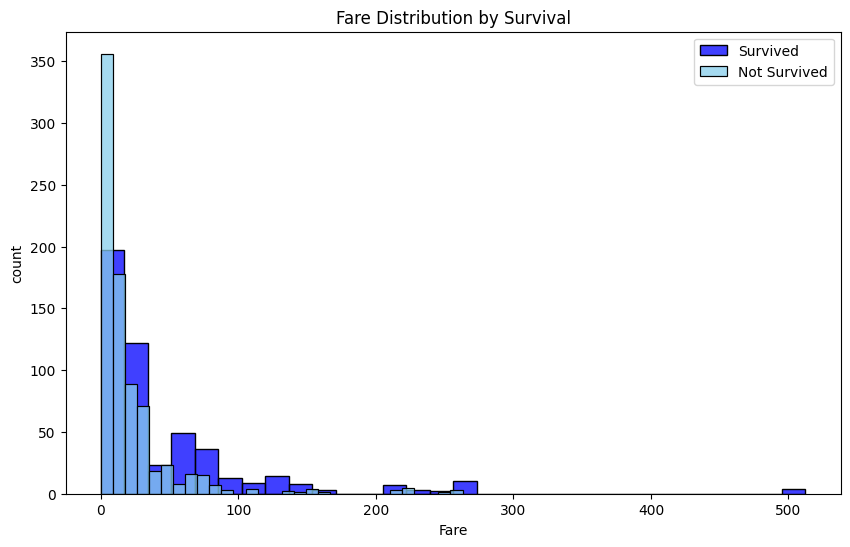

In [ ]:
# 나이와 생존, 사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df['survived']==1]['fare'],bins=30,kde=False,color='blue',label='Survived')
sns.histplot(df[df['survived']==0]['fare'],bins=30,kde=False,color='skyblue',label='Not Survived')
# kde=True 로 설정할 경우 kde 그래프도 위에 함께 그려줌.
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('count')
plt.legend()
plt.show()


Q. 가족 동반 여부와 생존율 관계를 시각화하여 출력하세요.

with_family
0    0.302532
1    0.502890
Name: survived, dtype: float64 



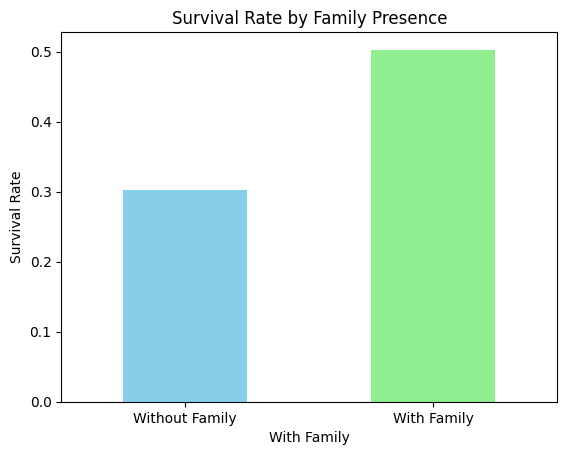

In [ ]:
# 가족 동반 여부를 나타내는 파생 변수 생성
df['with_family'] = (df['sibsp'] + df['parch'] > 0).astype(int)

# 가족 동반 여부에 따른 생존율 계산
survival_by_family = df.groupby('with_family')['survived'].mean()
print(survival_by_family,'\n')

# 시각화
survival_by_family.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Family Presence')
plt.xlabel('With Family')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Without Family', 'With Family'], rotation=0)
plt.show()

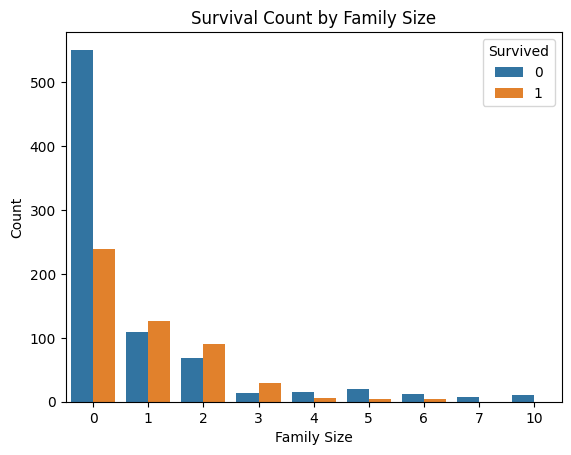

In [ ]:
# 가족 동반 여부와 생존사망자수 관계 시각화
df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()